# Regularization Exercises


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`. 

In [1]:
from __future__ import print_function
import os
#Create data folder and copy  "X_Y_Sinusoid_Data.csv" and "Ames_Housing_Sales.csv"
data_path = ['data']

## Question 1

* Import the data. 

* Print the first five rows and shape of the dataset.

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [2]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['X_Y_Sinusoid_Data.csv'])   #modify
df = pd.read_csv(filepath)         #MODIFY

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

In [5]:
#write your code
df.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [6]:
#write your code
df.shape

(20, 2)

In [3]:
da = pd.DataFrame({'x':X_real, 'y':Y_real})

In [8]:
da.head()


,x,y
0,0.000000,0.000000
1,0.010101,0.063424
2,0.020202,0.126592
3,0.030303,0.189251
4,0.040404,0.251148


In [ ]:
da.shape

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

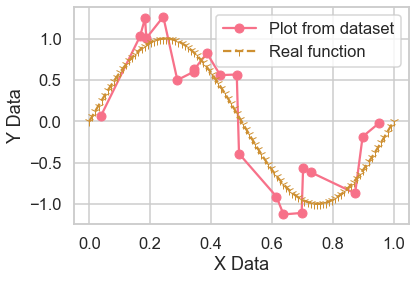

In [17]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette("husl", 8)

# Plot of the noisy (sparse)
ax = df.set_index('x')['y'].plot(ls='-', marker='o', label='Plot from dataset')
ax.plot(X_real,Y_real, ls='--', marker='1', label='Real function')  #modify 

ax.legend()
ax.set(xlabel='X Data', ylabel='Y Data');  #modify
#################
#plt.plot(data[x],data[y])

## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

Text(0.5, 0, 'x data')

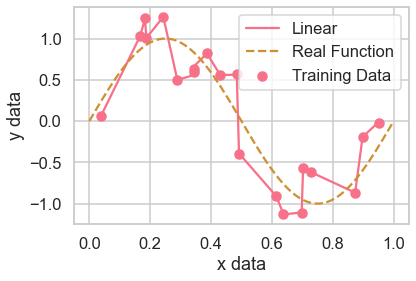

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
deg = 20          #modify your code
pf = PolynomialFeatures(deg)     #modify your code  
lr = LinearRegression()
#write your code
# fit the model
poly_data = pf.fit_transform(pd.DataFrame(df.x))
lr.fit(poly_data,df.y)
y_pred = lr.predict(poly_data)
# plot the data
plt.plot(df.x,y_pred, label = 'Linear')   #modify
plt.plot(X_real,Y_real , label = 'Real Function', ls='--')   #modify
plt.scatter(df.x,df.y , label = 'Training Data')    #modify
plt.legend()
plt.ylabel("y data")
plt.xlabel("x data")

## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. from sklearn.linear_model import Ridge, Lasso

What does the comparatively large magnitude of the data tell you about the role of regularization?

Text(0.5, 0, 'x data')

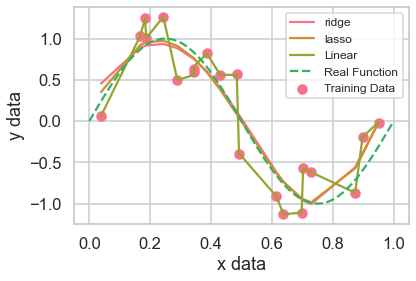

In [23]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.linear_model import Ridge, Lasso

## Ridge ####################
#write your code
ridge_regression = Ridge(alpha = 0.001)
ridge_regression.fit(poly_data,df['y'])
y_predict_ridge = ridge_regression.predict(poly_data)

## Lasso  ####################
#write your code

lasso_regression = Lasso(alpha = 0.0001)
lasso_regression.fit(poly_data,df['y'])
y_predict_lasso = lasso_regression.predict(poly_data)

######################


# Ploting the prediciton
plt.plot(df['x'],y_predict_ridge , label = 'ridge')
plt.plot(df['x'],y_predict_lasso , label = 'lasso')
plt.plot(df['x'],y_pred , label = 'Linear')
plt.plot(X_real,Y_real , label = 'Real Function', ls='--')
plt.scatter(df['x'],df['y'] , label = 'Training Data')
plt.legend(loc = 'best', fontsize = '12')
plt.ylabel("y data")
plt.xlabel("x data")

#write explanation here
Regularization helps to overcome the problem of overfitting. It significantly reduces the variance of the model.